In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch
from Model.inverse_VideoUNet import inverse_VideoUNet
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [4]:
device=torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

In [5]:
stat_dict=torch.load("Model/inverse_checkpoint.pth")
model=inverse_VideoUNet(input_shape=[3,32,32],ncell=140,hiddensize=32)
model.load_state_dict(stat_dict)
model=model.eval()
model=model.to(device)

val_input=torch.load("/data/test_input")
val_output=torch.load("/data/test_output")
val_output=val_output.permute(0,2,1,3,4)
val_input=val_input.float()
val_output=val_output.float()
val_output=val_output[:,:,:,16:48,16:48]
loss_all=0
target_list=[]
result_list=[]

test_size=val_output.size(0)
batch_size_test=int(test_size/64)
for batch_idx in range(0, test_size, batch_size_test):
    with torch.no_grad():       
        batch_test = val_output[batch_idx:batch_idx + batch_size_test].to(device)
        test_result = model(batch_test)
        target_test = val_input[batch_idx:batch_idx + batch_size_test].to(device)
        target_test=target_test.mean(dim=0)
        test_result=test_result.mean(dim=0)
        target_list.append(target_test)
        result_list.append(test_result)


In [6]:
ranges = {"PFC": (0, 30),  
            "FEF": (30, 60),
            "LIP": (60, 90),
            "MT": (90, 110),
            "IT": (110, 120),
            "V4": (120, 140),
            }

def region(data, region, ranges):
    start, end = ranges[region]
    return data[:,start:end]

roi='IT'

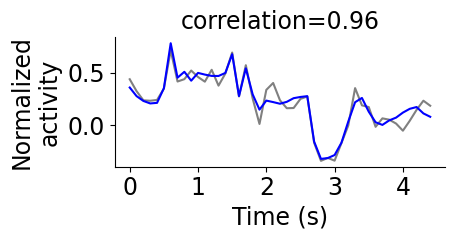

In [7]:
plt.figure(figsize=(5,2.5))
ft=int(17)

sti, cue=7, 0
idx_sti = int(sti*4+cue+1)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.plot(np.mean(region(target_list[idx_sti],roi,ranges).T.cpu().numpy(),0),label="recorded",color='gray')
plt.plot(np.mean(region(result_list[idx_sti],roi,ranges).T.cpu().numpy(),0),label="predicted",color='b')

corr=scipy.stats.pearsonr(np.mean(region(target_list[idx_sti],roi,ranges).T.cpu().numpy(),0),np.mean(region(result_list[idx_sti],roi,ranges).T.cpu().numpy(),0))[0]

plt.title(f"correlation={corr:.2f}", fontsize=ft)
plt.xticks([0,10,20,30,40],[0,1,2,3,4],fontsize=ft)
plt.yticks(fontsize=ft)
plt.xlabel('Time (s)', fontsize=ft)
plt.ylabel('Normalized\nactivity', fontsize=ft)
plt.tight_layout()
plt.show()

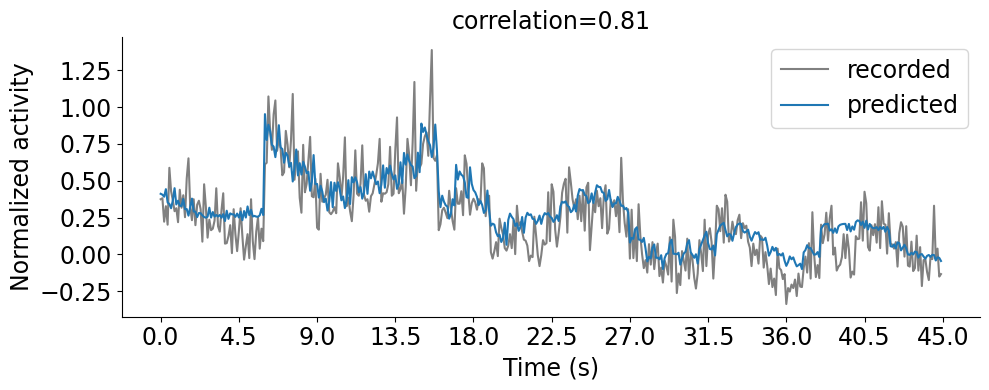

In [8]:
plt.figure(figsize=(10,4))
ft=17

sti, cue=7,2
idx_sti = int(sti*4+cue+1)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(region(target_list[idx_sti],roi,ranges).flatten().cpu().numpy(),label="recorded",color='gray')
plt.plot(region(result_list[idx_sti],roi,ranges).flatten().cpu().numpy(),label="predicted")
corr=scipy.stats.pearsonr(region(target_list[idx_sti],roi,ranges).T.flatten().cpu().numpy(),region(result_list[idx_sti],roi,ranges).T.flatten().cpu().numpy())[0]
plt.legend(loc='upper right',fontsize=ft)
plt.title(f"correlation={corr:.2f}", fontsize=ft)
plt.xticks(ticks=np.arange(0, 495, 45), labels=list(np.arange(0, 49.6, 4.5))[:-1], fontsize=ft)
plt.yticks(fontsize=ft)
plt.xlabel('Time (s)', fontsize=ft)
plt.ylabel('Normalized activity', fontsize=ft)
plt.tight_layout()
plt.show()

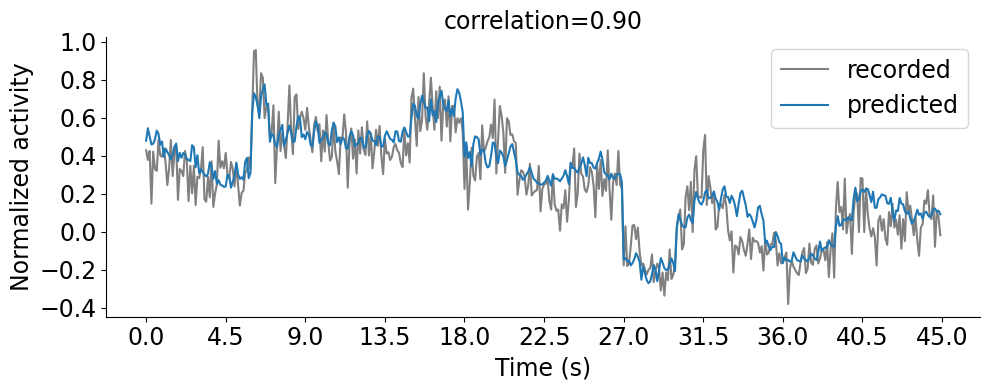

In [9]:
plt.figure(figsize=(10,4))
ft=17

sti, cue=2, 0
idx_sti = int(sti*4+cue+1)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(region(target_list[idx_sti],roi,ranges).flatten().cpu().numpy(),label="recorded",color='gray')
plt.plot(region(result_list[idx_sti],roi,ranges).flatten().cpu().numpy(),label="predicted")
corr=scipy.stats.pearsonr(region(target_list[idx_sti],roi,ranges).T.flatten().cpu().numpy(),region(result_list[idx_sti],roi,ranges).T.flatten().cpu().numpy())[0]
plt.legend(loc='upper right',fontsize=ft)
plt.title(f"correlation={corr:.2f}", fontsize=ft)
plt.xticks(ticks=np.arange(0, 495, 45), labels=list(np.arange(0, 49.6, 4.5))[:-1], fontsize=ft)
plt.yticks(fontsize=ft)
plt.xlabel('Time (s)', fontsize=ft)
plt.ylabel('Normalized activity', fontsize=ft)
plt.tight_layout()
plt.show()
